In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-turbine-scada-dataset/T1.csv


**IMPORTING LIBRARIES**

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**LOADING THE DATASET**

In [3]:
df = pd.read_csv("../input/wind-turbine-scada-dataset/T1.csv")
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [4]:
dfcpy = pd.read_csv("../input/wind-turbine-scada-dataset/T1.csv", index_col=[0], parse_dates=[0])
dfcpy

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500


In [5]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [6]:
df.info

<bound method DataFrame.info of               Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645905          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.641113 

In [7]:
df.describe

<bound method NDFrame.describe of               Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645905          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.64111

In [8]:
df.dtypes

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

**CHECKING FOR NULL VALUES**

In [9]:
#Checking for null values
df.isnull().any()

Date/Time                        False
LV ActivePower (kW)              False
Wind Speed (m/s)                 False
Theoretical_Power_Curve (KWh)    False
Wind Direction (°)               False
dtype: bool

In [10]:
#renaming a column name
df.rename(columns = {'LV ActivePower (kW)':'Actualpower'}, inplace = True)
df.rename(columns = {'Wind Speed (m/s)':'Windspeed'}, inplace = True)
df.rename(columns = {'Wind Direction (°)':'Winddir'}, inplace = True)
df.rename(columns = {'Theoretical_Power_Curve (KWh)':'Thpower'}, inplace = True)
df.rename(columns = {'Date/Time':'DateTime'}, inplace = True)
df

,DateTime,Actualpower,Windspeed,Thpower,Winddir
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [11]:
#renaming column names of copy dataframe
dfcpy.rename(columns = {'LV ActivePower (kW)':'Actualpower'}, inplace = True)
dfcpy.rename(columns = {'Wind Speed (m/s)':'Windspeed'}, inplace = True)
dfcpy.rename(columns = {'Wind Direction (°)':'Winddir'}, inplace = True)
dfcpy.rename(columns = {'Theoretical_Power_Curve (KWh)':'Thpower'}, inplace = True)
dfcpy.rename(columns = {'Date/Time':'DateTime'}, inplace = True)
dfcpy

,Actualpower,Windspeed,Thpower,Winddir
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500


# EXPLORATORY DATA ANALYSIS

**UNIVARIATE ANALYSIS**

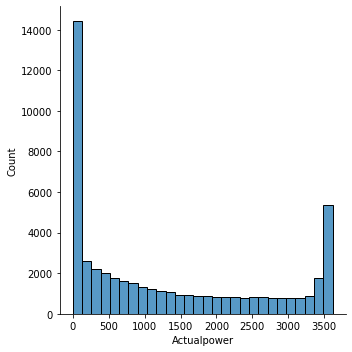

In [12]:
sns.displot(df.Actualpower)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Thpower', ylabel='Density'>

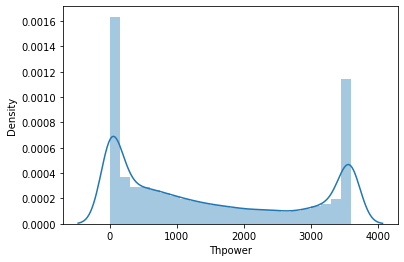

In [13]:
sns.distplot(df.Thpower)

<AxesSubplot:xlabel='Windspeed', ylabel='Density'>

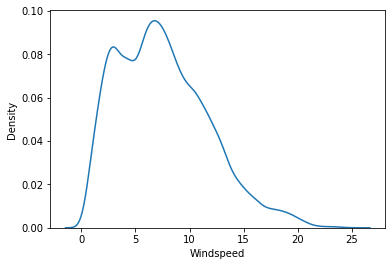

In [14]:
sns.kdeplot(df['Windspeed'])

**BIVARIATE ANALYSIS**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Actual Power (KW)')

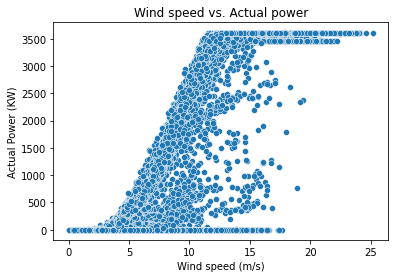

In [15]:
sns.scatterplot(df.Windspeed,df.Actualpower)
plt.title('Wind speed vs. Actual power')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Actual Power (KW)')

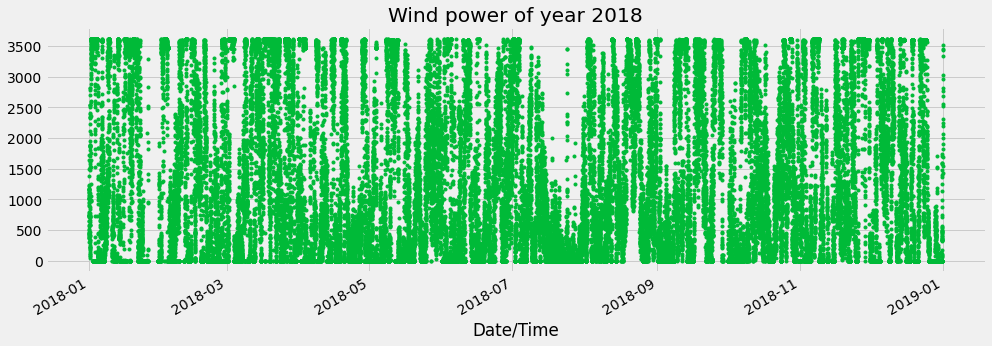

In [16]:
Powergen = dfcpy.Actualpower
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
plt.style.use('fivethirtyeight')
Powergen.plot(style='.', figsize=(15,5), color=color_pal[3], title='Wind power of year 2018')
plt.show()

**MULTI - VARIATE ANALYSIS**

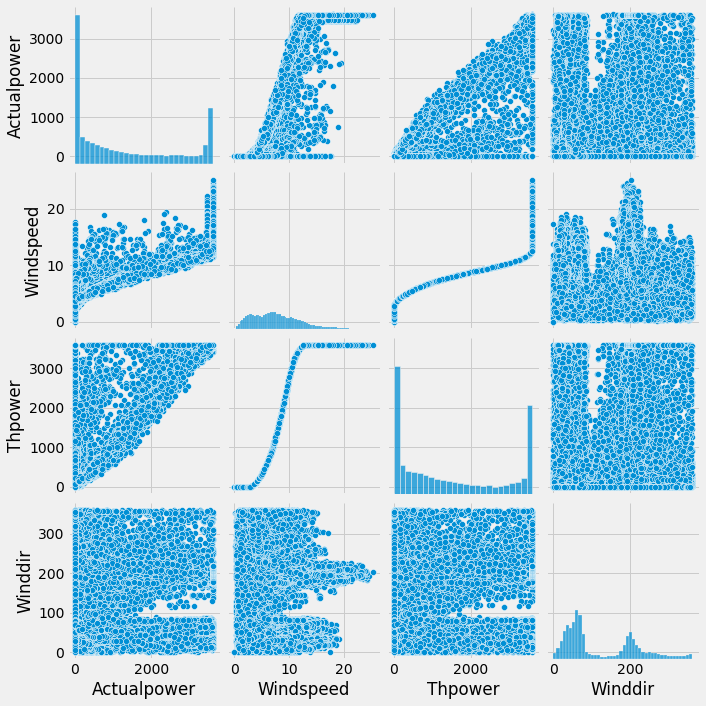

In [17]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'Actualpower'}>,
        <AxesSubplot:title={'center':'Windspeed'}>],
       [<AxesSubplot:title={'center':'Thpower'}>,
        <AxesSubplot:title={'center':'Winddir'}>]], dtype=object)

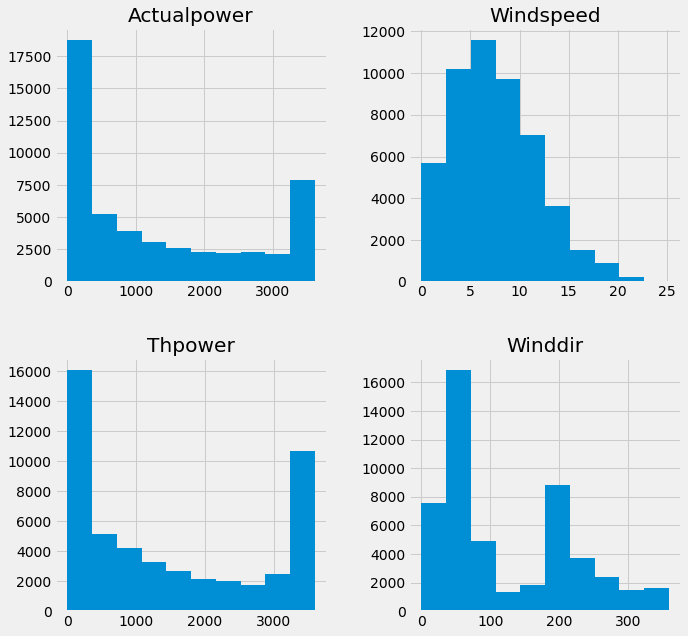

In [18]:
df.hist(figsize=(10,10))

**CORRELATION HEATMAP**

<AxesSubplot:>

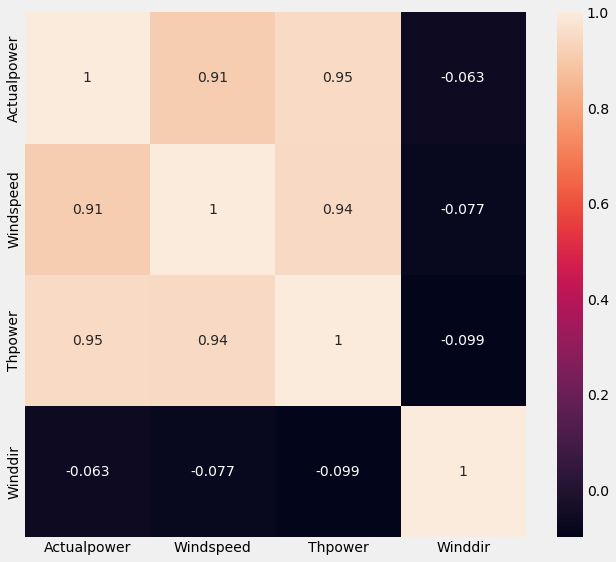

In [19]:
plt.figure(figsize=[10,9])
sns.heatmap(df.corr(),annot=True)

**SPLITTING THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [20]:
#dependent variable
y=df['Actualpower']
y

0         380.047791
1         453.769196
2         306.376587
3         419.645905
4         380.650696
            ...     
50525    2963.980957
50526    1684.353027
50527    2201.106934
50528    2515.694092
50529    2820.466064
Name: Actualpower, Length: 50530, dtype: float64

In [21]:
#independent variable
X=df.drop(columns=['Actualpower'],axis=1)
X.head()

,DateTime,Windspeed,Thpower,Winddir
0,01 01 2018 00:00,5.311336,416.328908,259.994904
1,01 01 2018 00:10,5.672167,519.917511,268.641113
2,01 01 2018 00:20,5.216037,390.900016,272.564789
3,01 01 2018 00:30,5.659674,516.127569,271.258087
4,01 01 2018 00:40,5.577941,491.702972,265.674286


**SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA**

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#0.3 indicates 30% test dataset and remaining 70% training dataset which is ideal size of dataset for ml algorithms training and testing 

In [23]:
X_train

,DateTime,Windspeed,Thpower,Winddir
38813,07 10 2018 18:10,4.917305,315.941033,75.052711
8702,06 03 2018 22:10,18.171650,3600.000000,191.438904
47744,12 12 2018 14:00,4.521145,226.488817,277.027191
8955,08 03 2018 16:20,7.783165,1408.377582,296.402588
2497,18 01 2018 11:50,11.300580,3368.556193,353.138489
...,...,...,...,...
21243,02 06 2018 05:30,6.433000,780.031276,59.202740
45891,29 11 2018 16:00,14.897790,3600.000000,33.390461
42613,03 11 2018 07:00,11.193800,3336.659665,64.414131
43567,09 11 2018 22:00,6.438095,781.987996,73.024986
